X.shape (2000, 4), W_init.shape (1, 4)


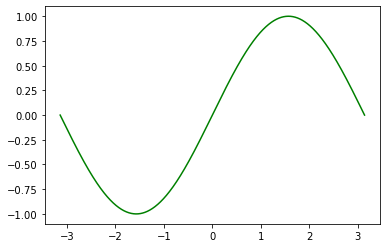

In [25]:
# python implementation
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from IPython import display

m = 2000
np.random.seed(42)

x = np.linspace(-math.pi, math.pi, m)
y = np.sin(x)
y = y.reshape(m,1) # make column vector

# Setup feature array and init weight 

X = np.array([np.ones(m),x,x**2,x**3]).transpose()
W_init = np.random.randn(1,4)

print(f'X.shape {X.shape}, W_init.shape {W_init.shape}')

fig, ax = plt.subplots()
ax.plot(x,y,color='green')

KeyboardInterrupt: 

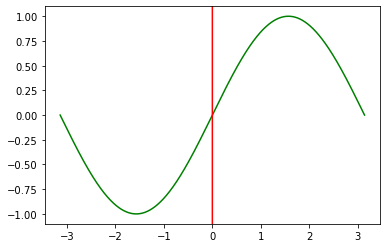

In [26]:
learning_rate = 1e-6
W=W_init


fig, ax = plt.subplots()
ax.plot(x,y,color='green')
# separate 2dline ready to update
ln, = ax.plot(x,y,color='red')

for t in range(1000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = np.dot(X,W.transpose())

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    
    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 *(y_pred - y)
    grad_W = np.sum(grad_y_pred*X,0).reshape(1,4)
    # Update weights
    W = (W-learning_rate*grad_W)
    
    # update line data
    ln.set_data(x,y_pred)
    
    # display the fig in ipython
    display.clear_output(wait=True)
    display.display(fig)
    #plt.savefig(f'file {t}')
